# Sentdex: Neural Networks and Deep Learning 8: Model Analysis

* We need to keep close attention to how the model is reacting to training over time.
* As long as loss is going down, we are learning something.
* But how does the in-sample accuracy compare to out-of-sample accuracy,it is very important.
* While training, the model eventually brute forces and memorizes that dataset that you feed it, espcially when the dataset is small (25000 samples is quite small).

* To monitor the behaviour of the model, we need to run test() after every EPOCH, ideally every batch for in-sample tests atleast.

* Model Analysis is the topic of how the model works, why and how good it is.
* In-sample accuracy, In-sample loss, Out-of-sample accuracy, Out-of-sample loss are four metrics which when tracked and trended over time, gives pretty good idea about the model and gives us a basic idead about two things:
    * How long should the train the model for? When should we stop training?
    * What model is better? (Done by assigning the same task to two models).

  0%|▏                                                                             | 26/12501 [00:00<00:48, 255.14it/s]

Running on the CPU.
PetImages/Cat


  0%|▎                                                                             | 46/12501 [00:00<00:27, 451.94it/s]

PetImages/Dog


100%|███████████████████████████████████████████████████████████████████████████| 12501/12501 [00:29<00:00, 427.05it/s]
C:\Users\aseem\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Cats: 12476
Dogs: 12470
24946
[array([[236, 207, 204, ..., 204, 204, 195],
        [225, 200, 205, ..., 201, 200, 193],
        [239, 209, 211, ..., 203, 203, 187],
        ...,
        [179, 129,  96, ..., 145, 135, 136],
        [178, 129,  96, ..., 128, 138, 138],
        [177, 123, 101, ..., 136, 138, 141]], dtype=uint8) array([1., 0.])]
torch.Size([128, 2, 2])
2494
22452
2494


'BATCH_SIZE = 100\nEPOCHS = 1\n\ndef train(net):\n    for epoch in range(EPOCHS):\n        for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev\n            #print(f"{i}:{i+BATCH_SIZE}")\n            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)\n            batch_y = train_y[i:i+BATCH_SIZE]\n\n            net.zero_grad()\n\n            outputs = net(batch_X)\n            loss = loss_function(outputs, batch_y)\n            loss.backward()\n            optimizer.step()    # Does the update\n\n        print(f"Epoch: {epoch}. Loss: {loss}")    \n\n\n        \ndef test(net):\n    correct = 0\n    total = 0\n    with torch.no_grad():\n        for i in tqdm(range(len(test_X))):\n            real_class = torch.argmax(test_y[i])\n            net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, \n            predicted_class = torch.argmax(net_out)\n\n            if predicted_class == real_c

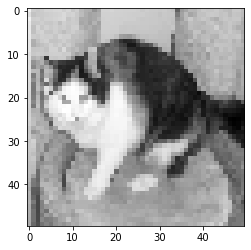

In [4]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU.")
else:
    device = torch.device("cpu")
    print("Running on the CPU.")
    
REBUILD_DATA = True 

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

training_data = np.load("training_data.npy", allow_pickle = True)

print(len(training_data))

print(training_data[1])

import matplotlib.pyplot as plt

plt.imshow(training_data[1][0], cmap="gray")
plt.show

training_data[1][1]


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 128, 5)
        
        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 2)
        
    def convs(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
        
        print(x[0].shape)
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.softmax(x, dim=1)
    
net = Net()    



import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT =0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)



train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))



'''BATCH_SIZE = 100
EPOCHS = 1

def train(net):
    for epoch in range(EPOCHS):
        for i in tqdm(range(0, len(train_X), BATCH_SIZE)): # from 0, to the len of x, stepping BATCH_SIZE at a time. [:50] ..for now just to dev
            #print(f"{i}:{i+BATCH_SIZE}")
            batch_X = train_X[i:i+BATCH_SIZE].view(-1, 1, 50, 50)
            batch_y = train_y[i:i+BATCH_SIZE]

            net.zero_grad()

            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()    # Does the update

        print(f"Epoch: {epoch}. Loss: {loss}")    


        
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in tqdm(range(len(test_X))):
            real_class = torch.argmax(test_y[i])
            net_out = net(test_X[i].view(-1, 1, 50, 50))[0]  # returns a list, 
            predicted_class = torch.argmax(net_out)

            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accuracy: ", round(correct/total, 3))'''

In [24]:
def fwd_pass(X, y, train = False):
    
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs,y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs, y)
    
    if train:
        loss.backward()
        optimizer.step()
    return acc, loss    

In [25]:
def test(size = 32):
    random_start = np.random.randint(len(test_X)-size)
    X, y = test_X[random_start:random_start + size], test_y[random_start:random_start + size]
    with torch.no_grad():   
        val_acc, val_loss = fwd_pass(X.view(-1,1,50,50).to(device), y.to(device))
    return val_acc, val_loss

val_acc, val_loss = test(size = 32)
print(val_acc, val_loss)

torch.Size([128, 2, 2])
0.46875 tensor(0.2502)


In [27]:
import time

MODEL_NAME = f"model-{int(time.time())}"

net = Net().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 16
    EPOCHS = 5 
    with open("model.log", "a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0,len(train_X), BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50).to(device)
                batch_y = train_y[i:i+BATCH_SIZE].to(device)
                
                acc, loss = fwd_pass(batch_X, batch_y, train = True)
                if i % 50 == 0:    
                    val_acc, val_loss = test(size=64)
                    f.write(f"{MODEL_NAME}, {round(time.time(),3)}, {round(float(acc),2)}, {round(float(loss),4)}, {round(float(val_acc),2)}, {round(float(val_loss),4)}\n")

train()  
                    

  0%|                                                                                 | 1/1404 [00:00<02:58,  7.85it/s]

torch.Size([128, 2, 2])
model-1623929002
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

  0%|▎                                                                                | 6/1404 [00:00<01:19, 17.49it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  1%|▌                                                                                | 9/1404 [00:00<01:12, 19.15it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  1%|▊                                                                               | 14/1404 [00:00<01:09, 19.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

  1%|▉                                                                               | 16/1404 [00:00<01:11, 19.29it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▎                                                                              | 22/1404 [00:01<01:08, 20.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▎                                                                              | 24/1404 [00:01<01:09, 19.97it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▌                                                                              | 28/1404 [00:01<01:22, 16.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  2%|█▊                                                                              | 32/1404 [00:01<01:21, 16.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|██                                                                              | 37/1404 [00:02<01:16, 17.79it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|██▎                                                                             | 41/1404 [00:02<01:21, 16.75it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|██▌                                                                             | 44/1404 [00:02<01:13, 18.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|██▊                                                                             | 49/1404 [00:02<01:12, 18.79it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|██▉                                                                             | 51/1404 [00:02<01:22, 16.37it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|███▏                                                                            | 56/1404 [00:03<01:12, 18.56it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|███▍                                                                            | 61/1404 [00:03<01:11, 18.82it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|███▋                                                                            | 64/1404 [00:03<01:07, 19.92it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|███▉                                                                            | 70/1404 [00:03<01:06, 20.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|████▎                                                                           | 75/1404 [00:04<01:08, 19.27it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|████▍                                                                           | 77/1404 [00:04<01:17, 17.21it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|████▌                                                                           | 81/1404 [00:04<01:12, 18.30it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|████▊                                                                           | 85/1404 [00:04<01:14, 17.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  6%|█████                                                                           | 89/1404 [00:04<01:17, 16.90it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▎                                                                          | 93/1404 [00:05<01:18, 16.63it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▍                                                                          | 96/1404 [00:05<01:11, 18.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▋                                                                         | 101/1404 [00:05<01:17, 16.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  7%|█████▉                                                                         | 105/1404 [00:05<01:13, 17.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|██████▏                                                                        | 110/1404 [00:06<01:07, 19.18it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|██████▍                                                                        | 115/1404 [00:06<01:07, 19.17it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  8%|██████▋                                                                        | 118/1404 [00:06<01:05, 19.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

  9%|██████▉                                                                        | 124/1404 [00:06<01:02, 20.34it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  9%|███████▏                                                                       | 127/1404 [00:07<01:18, 16.33it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  9%|███████▍                                                                       | 132/1404 [00:07<01:10, 18.16it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 10%|███████▌                                                                       | 134/1404 [00:07<01:09, 18.33it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|███████▊                                                                       | 139/1404 [00:07<01:05, 19.30it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|████████▏                                                                      | 145/1404 [00:07<01:03, 19.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 10%|████████▎                                                                      | 147/1404 [00:08<01:06, 18.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 11%|████████▌                                                                      | 152/1404 [00:08<01:15, 16.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 11%|████████▊                                                                      | 156/1404 [00:08<01:09, 17.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 11%|█████████                                                                      | 160/1404 [00:08<01:07, 18.47it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▏                                                                     | 164/1404 [00:08<01:04, 19.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▌                                                                     | 170/1404 [00:09<01:04, 19.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▋                                                                     | 172/1404 [00:09<01:04, 18.99it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 12%|█████████▊                                                                     | 175/1404 [00:09<01:04, 19.16it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 13%|██████████                                                                     | 179/1404 [00:09<01:16, 16.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 13%|██████████▎                                                                    | 184/1404 [00:10<01:06, 18.42it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 13%|██████████▌                                                                    | 188/1404 [00:10<01:07, 18.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|██████████▊                                                                    | 193/1404 [00:10<01:10, 17.15it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|███████████▏                                                                   | 198/1404 [00:10<01:04, 18.59it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 14%|███████████▎                                                                   | 201/1404 [00:11<01:08, 17.44it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|███████████▋                                                                   | 207/1404 [00:11<01:03, 18.91it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|███████████▉                                                                   | 212/1404 [00:11<01:00, 19.85it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 15%|████████████▏                                                                  | 216/1404 [00:11<01:05, 18.21it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|████████████▍                                                                  | 220/1404 [00:12<01:04, 18.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|████████████▌                                                                  | 224/1404 [00:12<01:06, 17.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 16%|████████████▋                                                                  | 226/1404 [00:12<01:17, 15.25it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 17%|█████████████                                                                  | 232/1404 [00:12<01:07, 17.36it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 17%|█████████████▏                                                                 | 234/1404 [00:12<01:04, 18.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 17%|█████████████▌                                                                 | 240/1404 [00:13<00:57, 20.10it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 17%|█████████████▊                                                                 | 245/1404 [00:13<01:01, 18.86it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|██████████████                                                                 | 249/1404 [00:13<01:00, 19.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|██████████████                                                                 | 251/1404 [00:13<01:11, 16.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|██████████████▍                                                                | 256/1404 [00:14<01:04, 17.82it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 18%|██████████████▌                                                                | 258/1404 [00:14<01:04, 17.66it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 19%|██████████████▋                                                                | 262/1404 [00:14<01:02, 18.16it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 19%|███████████████                                                                | 268/1404 [00:14<00:58, 19.53it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 19%|███████████████▎                                                               | 272/1404 [00:14<00:59, 19.05it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|███████████████▍                                                               | 274/1404 [00:15<00:58, 19.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|███████████████▋                                                               | 278/1404 [00:15<01:05, 17.18it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|███████████████▉                                                               | 284/1404 [00:15<00:58, 19.08it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 20%|████████████████▏                                                              | 287/1404 [00:15<00:56, 19.87it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|████████████████▎                                                              | 291/1404 [00:15<00:59, 18.83it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|████████████████▋                                                              | 296/1404 [00:16<00:59, 18.55it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 21%|████████████████▉                                                              | 300/1404 [00:16<01:00, 18.24it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 22%|█████████████████▏                                                             | 305/1404 [00:16<01:04, 16.98it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 22%|█████████████████▎                                                             | 307/1404 [00:16<01:03, 17.36it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 22%|█████████████████▍                                                             | 311/1404 [00:17<01:04, 16.85it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|█████████████████▊                                                             | 316/1404 [00:17<01:00, 17.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|██████████████████                                                             | 320/1404 [00:17<01:03, 17.07it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 23%|██████████████████▎                                                            | 325/1404 [00:17<00:57, 18.79it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|██████████████████▌                                                            | 330/1404 [00:18<01:00, 17.89it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|██████████████████▊                                                            | 334/1404 [00:18<00:59, 18.08it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████                                                            | 338/1404 [00:18<00:56, 18.94it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|███████████████████▏                                                           | 340/1404 [00:18<00:57, 18.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|███████████████████▎                                                           | 344/1404 [00:18<00:57, 18.49it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|███████████████████▌                                                           | 348/1404 [00:19<00:59, 17.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 25%|███████████████████▋                                                           | 350/1404 [00:19<01:02, 16.81it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|████████████████████                                                           | 356/1404 [00:19<01:03, 16.38it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|████████████████████▏                                                          | 359/1404 [00:19<00:57, 18.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|████████████████████▍                                                          | 364/1404 [00:20<00:53, 19.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 26%|████████████████████▊                                                          | 369/1404 [00:20<00:51, 20.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 27%|█████████████████████                                                          | 375/1404 [00:20<00:49, 20.72it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 27%|█████████████████████▎                                                         | 378/1404 [00:20<00:55, 18.56it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 27%|█████████████████████▌                                                         | 384/1404 [00:21<00:51, 19.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 28%|█████████████████████▉                                                         | 390/1404 [00:21<00:53, 19.11it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 28%|██████████████████████▏                                                        | 394/1404 [00:21<00:54, 18.40it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 28%|██████████████████████▎                                                        | 396/1404 [00:21<00:56, 17.74it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|██████████████████████▌                                                        | 401/1404 [00:22<01:01, 16.30it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|██████████████████████▋                                                        | 404/1404 [00:22<00:56, 17.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 29%|███████████████████████                                                        | 410/1404 [00:22<00:54, 18.22it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


KeyboardInterrupt: 

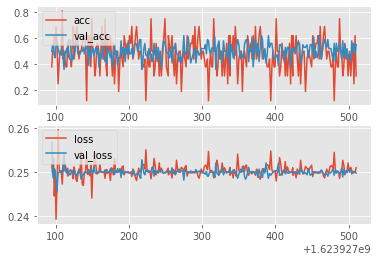

In [23]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

model_name = MODEL_NAME #"model-1570499409" # grab whichever model name you want here. We could also just reference the MODEL_NAME if you're in a notebook still.


def create_acc_loss_graph(model_name):
    contents = open("model.log", "r").read().split("\n")

    times = []
    accuracies = []
    losses = []

    val_accs = []
    val_losses = []

    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss = c.split(",")

            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))

            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))


    fig = plt.figure()

    ax1 = plt.subplot2grid((2,1), (0,0))
    ax2 = plt.subplot2grid((2,1), (1,0), sharex=ax1)


    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times,losses, label="loss")
    ax2.plot(times,val_losses, label="val_loss")
    ax2.legend(loc=2)
    plt.show()

create_acc_loss_graph(model_name)